# Prosper Dataset Exploration

In [1]:
pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

### Load data, inspect, format and subset to columns of interest

In [3]:
#load and inspect
#loans = pd.read_csv(r'C:\Users\Al\Dropbox\memphis\teaching\2021 spring\7840\data\propsper.csv', low_memory=False)
loans = pd.read_csv(r'C:\Users\al_ca\Dropbox\memphis\teaching\2024_spring\FIR 7840\data\prosper_short.csv', low_memory=False)
#loans = pd.read_csv(r'C:\Users\al_ca\Dropbox\memphis\teaching\2024_spring\FIR 7840\data\prosper\prosper.csv', low_memory=False)
#loans.head()
#loans.tail()

In [4]:
loans.columns

Index(['loan_number', 'amount_borrowed', 'borrower_rate', 'prosper_rating',
       'term', 'age_in_months', 'origination_date', 'days_past_due',
       'principal_balance', 'service_fees_paid',
       ...
       'CV21', 'CV22', 'CV23', 'CV24', 'TUFicoRange', 'TUFicoDate',
       'dti_wprosper_loan', 'CoBorrowerApplication', 'CombinedDtiwProsperLoan',
       'CombinedStatedMonthlyIncome'],
      dtype='object', length=880)

In [5]:
loans.columns[10:50]

Index(['principal_paid', 'interest_paid', 'prosper_fees_paid',
       'late_fees_paid', 'debt_sale_proceeds_received', 'loan_status',
       'loan_status_description', 'loan_default_reason',
       'loan_default_reason_description', 'next_payment_due_date',
       'next_payment_due_amount', 'co_borrower_application', 'listing_number',
       'member_key', 'credit_pull_date', 'listing_start_date',
       'listing_end_date', 'listing_creation_date', 'listing_status',
       'listing_status_reason', 'listing_amount', 'amount_remaining',
       'percent_funded', 'partial_funding_indicator', 'funding_threshold',
       'estimated_return', 'estimated_loss_rate', 'lender_yield',
       'effective_yield', 'borrower_apr', 'listing_monthly_payment', 'scorex',
       'scorex_change', 'fico_score', 'prosper_score', 'listing_category_id',
       'income_range', 'income_range_description', 'stated_monthly_income',
       'income_verifiable'],
      dtype='object')

In [6]:
loans.index

RangeIndex(start=0, stop=25000, step=1)

In [7]:
#what are the datatypes in each column?
loans.dtypes

loan_number                      int64
amount_borrowed                float64
borrower_rate                  float64
prosper_rating                  object
term                             int64
                                ...   
TUFicoDate                     float64
dti_wprosper_loan              float64
CoBorrowerApplication             bool
CombinedDtiwProsperLoan        float64
CombinedStatedMonthlyIncome    float64
Length: 880, dtype: object

### Loan status
Most likely the source of our dependent variable

In [8]:
loans['loan_status_description'].describe()

count         25000
unique            4
top       COMPLETED
freq          19728
Name: loan_status_description, dtype: object

In [9]:
loans['loan_status_description'].value_counts()

loan_status_description
COMPLETED    19728
DEFAULTED     4478
CHARGEOFF      753
CANCELLED       41
Name: count, dtype: int64

In [10]:
loans.loc[ loans['loan_status_description'].isnull() ]

,loan_number,amount_borrowed,borrower_rate,prosper_rating,term,age_in_months,origination_date,days_past_due,principal_balance,service_fees_paid,...,CV21,CV22,CV23,CV24,TUFicoRange,TUFicoDate,dti_wprosper_loan,CoBorrowerApplication,CombinedDtiwProsperLoan,CombinedStatedMonthlyIncome


### Loan term

How many types?  Do we want to separate out one type to focus on, or pool them together?

In [11]:
loans['term'].describe()

count    25000.000000
mean        44.180160
std         11.376027
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64

In [12]:
loans['term'].value_counts()

term
36    16479
60     8521
Name: count, dtype: int64

In [13]:
#Let's just focus on 3 year loans
loans = loans.loc[loans['term']==36]

### Loan grade

How does Propsper rate the loan?

In [14]:
loans['prosper_rating'].describe()

count     16479
unique        7
top           A
freq       4311
Name: prosper_rating, dtype: object

In [15]:
loans['prosper_rating'].value_counts()

prosper_rating
A     4311
B     3752
C     3474
AA    2434
D     1613
E      651
HR     244
Name: count, dtype: int64

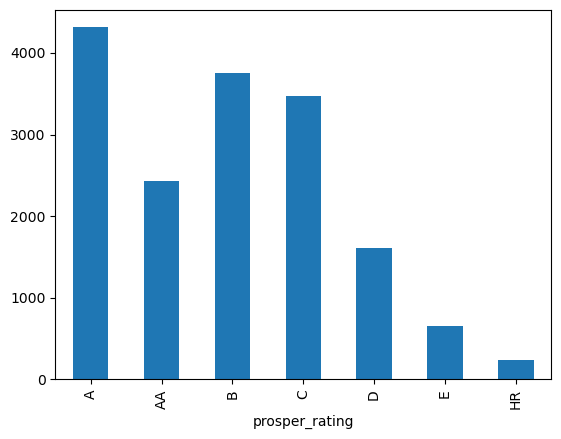

In [16]:
fig = loans.groupby('prosper_rating')['prosper_rating'].count().plot(kind='bar')

In [17]:
#let's change the rating datatype so it sorts nicely
ratings = ['AA','A','B','C','D','E','HR']
loans['prosper_rating'] = pd.Categorical(loans['prosper_rating'], ordered=True, categories=ratings)

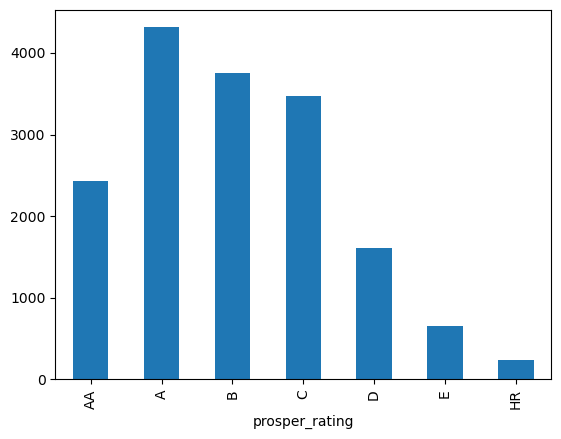

In [18]:
fig = loans.groupby('prosper_rating')['prosper_rating'].count().plot(kind='bar')

### Loan amount

Does this come in a usable datatype? What does the distribution look like?  Do the outliers look real?

In [19]:
loans['amount_borrowed'].describe()

count    16479.000000
mean     11720.833903
std       8085.792901
min       2000.000000
25%       5500.000000
50%       9800.000000
75%      16000.000000
max      35000.000000
Name: amount_borrowed, dtype: float64

<Axes: >

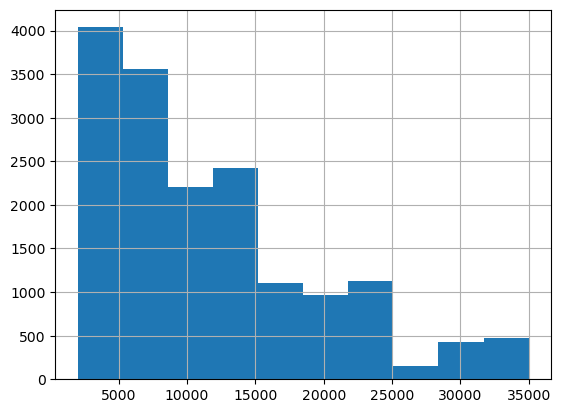

In [20]:
loans['amount_borrowed'].hist()

### How do loan grade and loan amount relate to probabilty of default?

In [21]:
loans['origination_date'] = pd.to_datetime(loans['origination_date'])

In [22]:
loans['orig_year'] = loans['origination_date'].dt.year

In [23]:
#loans = loans.loc[loans['orig_year']==2015]

In [24]:
#Make defaulted dummy column
loans['defaulted'] = 0

In [25]:
loans.loc[loans['loan_status_description']=='CHARGEOFF', 'defaulted'] = 1
loans.loc[loans['loan_status_description']=='DEFAULTED', 'defaulted'] = 1

In [26]:
#Get rid of loans that are still outstanding ( we don't know if they will eventually default) and loans that were cancelled
loans.loc[loans['loan_status_description']=='CURRENT', 'defaulted'] = -1
loans.loc[loans['loan_status_description']=='CANCELLED', 'defaulted'] = -1
loans = loans.loc[loans['defaulted']>= 0]

In [27]:
#average default rate
loans['defaulted'].mean()

0.17073911986384635

In [28]:
loans['defaulted'].value_counts()

defaulted
0    13643
1     2809
Name: count, dtype: int64

In [29]:
#default rate by rating
loans.groupby('prosper_rating')['defaulted'].mean()

prosper_rating
AA    0.059573
A     0.111757
B     0.170895
C     0.241708
D     0.267081
E     0.304012
HR    0.319672
Name: defaulted, dtype: float64

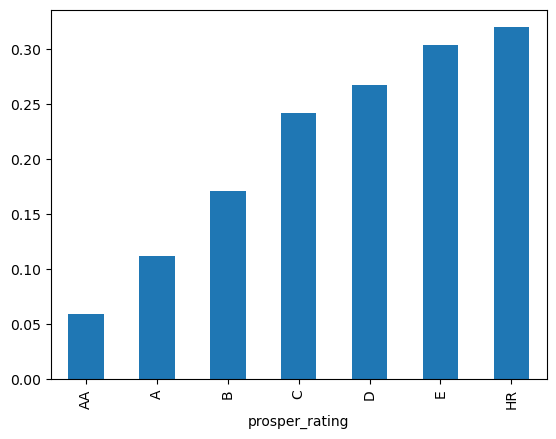

In [30]:
fig = loans.groupby('prosper_rating')['defaulted'].mean().plot(kind='bar')

In [31]:
#correlation between default and loan size
loans['defaulted'].corr(loans['amount_borrowed'])

0.0068794862906008045